# Analysis of results 

In [1]:
cd ~/thesis/

/home/jovyan/thesis


/home/jovyan/venvs/my_environment/lib/python3.10/site-packages/IPython/core/magics/osm.py:393: UserWarning: using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
/home/jovyan/venvs/my_environment/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


## Initial processing

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import ast

from analysis_utils import *

/tmp/ipykernel_330/70208650.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
results_df = pd.read_csv('results.csv')

In [4]:
results_df.head(10)

,dataset,nodes,edges,retraining_type,metric,10%,20%,30%,40%,50%,60%,70%,80%,90%,parameters,training_time,dynamic_update,num_different_nodes,num_starting_nodes,execution_timestamp
0,blog_catalog,10312,333983,global,macro,0.200753,0.199724,0.214322,0.201168,0.206342,0.200239,0.198569,0.192867,0.195230,"(128, 40, 80, 0.25, 1)",5098.421046,extend,512,512,14/06/2024 - 19:57
1,blog_catalog,10312,333983,global,micro,0.204457,0.201648,0.214932,0.201939,0.207331,0.200388,0.199335,0.193939,0.195453,"(128, 40, 80, 0.25, 1)",5098.421046,extend,512,512,14/06/2024 - 19:57
2,blog_catalog,10312,333983,local,macro,0.183361,0.202239,0.196802,0.206104,0.213029,0.212130,0.213315,0.205747,0.208313,"(128, 40, 80, 0.25, 1)",1466.205247,extend,512,512,14/06/2024 - 19:57
3,blog_catalog,10312,333983,local,micro,0.185078,0.203102,0.197802,0.207030,0.214119,0.213316,0.214711,0.208000,0.209676,"(128, 40, 80, 0.25, 1)",1466.205247,extend,512,512,14/06/2024 - 19:57
4,blog_catalog,10312,333983,global,macro,0.209010,0.205892,0.206661,0.204214,0.202344,0.195139,0.198391,0.207131,0.201637,"(128, 40, 80, 0.25, 1)",4254.954576,prune,512,5876,14/06/2024 - 16:52
5,blog_catalog,10312,333983,global,micro,0.209184,0.206122,0.208092,0.205357,0.203469,0.195748,0.199971,0.207781,0.202381,"(128, 40, 80, 0.25, 1)",4254.954576,prune,512,5876,14/06/2024 - 16:52
6,blog_catalog,10312,333983,local,macro,0.178364,0.192953,0.188758,0.200132,0.201297,0.201317,0.193922,0.206374,0.203722,"(128, 40, 80, 0.25, 1)",1494.013343,prune,512,5876,14/06/2024 - 16:52
7,blog_catalog,10312,333983,local,micro,0.181202,0.194377,0.190368,0.202909,0.202676,0.202650,0.194902,0.206788,0.204612,"(128, 40, 80, 0.25, 1)",1494.013343,prune,512,5876,14/06/2024 - 16:52
8,blog_catalog,10312,333983,global,macro,0.186685,0.191709,0.193777,0.199486,0.204721,0.201654,0.196953,0.191641,0.197756,"(128, 40, 80, 0.25, 1)",4969.717611,extend,512,512,14/06/2024 - 13:55
9,blog_catalog,10312,333983,global,micro,0.189922,0.194862,0.196186,0.200970,0.206168,0.203782,0.198642,0.194303,0.199978,"(128, 40, 80, 0.25, 1)",4969.717611,extend,512,512,14/06/2024 - 13:55


In [5]:
results_df.size

65040

In [6]:
# These are the parameters for calculating the gloal/local difference
config = {'dataset': 'cora',
          'dynamic_update': 'extend',
          'metric': 'macro',
          'parameters': '(128, 80, 160, 4, 4)',
          'num_different_nodes': 512}

In [8]:
sub_df = accu_time_df_gen(results_df, config)

In [9]:
# Calculate the average accuracy difference
avg_accuracy_diff_perc = 100* (abs(sub_df.loc[0, 'average_accuracy'] - sub_df.loc[1, 'average_accuracy']) / sub_df.loc[0, 'average_accuracy'])

# Calculate the training time difference
training_time_diff_perc = 100* (abs(sub_df.loc[0, 'training_time'] - sub_df.loc[1, 'training_time'])) / sub_df.loc[0, 'training_time']

In [10]:
avg_accuracy_diff_perc, training_time_diff_perc

(1.0062304228615382, 69.9747829843204)

In [11]:
sub_df

,dataset,retraining_type,parameters,average_accuracy,training_time
0,cora,global,"(128, 80, 160, 4, 4)",0.790612,415.683768
1,cora,local,"(128, 80, 160, 4, 4)",0.782657,124.809953


### Hyperparameter tuning

In [16]:
# Should have been 300 (?)
all_parameters = list(results_df['parameters'].unique())
len(all_parameters)

371

#### Cora

In [17]:
config = {'dataset': 'cora',
          'dynamic_update': 'extend',
          'metric': 'macro',
          'num_different_nodes': 512}

In [18]:
all_df = mult_params_accu_time_df_gen(results_df, config, all_parameters)

In [19]:
all_df

cora,dataset,retraining_type,parameters,dynamic_update,average_accuracy,training_time
0,cora,global,"(128, 40, 80, 0.25, 1)",extend,0.794214,102.186127
1,cora,local,"(128, 40, 80, 0.25, 1)",extend,0.791296,30.813241
2,cora,global,"(128, 40, 80, 0.25, 4)",extend,0.764001,98.438024
3,cora,local,"(128, 40, 80, 0.25, 4)",extend,0.762352,29.946715
4,cora,global,"(128, 40, 80, 0.25, 2)",extend,0.783103,100.733689
...,...,...,...,...,...,...
199,cora,local,"(128, 40, 80, 0.5, 0.25)",extend,0.802119,33.299119
200,cora,global,"[64, 8, 8, 0.25, 4]",extend,0.719772,3.050927
201,cora,local,"[64, 8, 8, 0.25, 4]",extend,0.663561,2.501036
202,cora,global,"[64, 8, 8, 0.25, 4]",extend,0.731451,2.913603


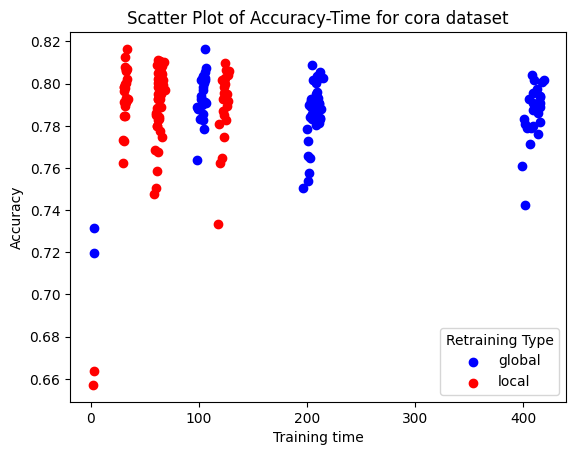

In [20]:
accu_time_plot(all_df)

In [21]:
# sub_df = sub_df[sub_df.loc[:, 'retraining_type'] == 'global'].reset_index(drop=True)
all_df.sort_values(by='average_accuracy', ascending=False).head(15)

cora,dataset,retraining_type,parameters,dynamic_update,average_accuracy,training_time
41,cora,local,"(128, 40, 80, 2, 1)",extend,0.816479,33.817051
32,cora,global,"(128, 40, 80, 4, 2)",extend,0.816394,105.576616
51,cora,local,"(128, 40, 80, 0.25, 0.25)",extend,0.812863,31.953484
153,cora,local,"(128, 40, 160, 1, 1)",extend,0.811209,62.478489
145,cora,local,"(128, 40, 160, 2, 0.5)",extend,0.810902,63.524729
113,cora,local,"(128, 80, 80, 1, 0.25)",extend,0.810208,64.816080
105,cora,local,"(128, 80, 80, 4, 0.25)",extend,0.810062,67.367942
87,cora,local,"(128, 80, 160, 0.5, 1)",extend,0.809882,123.806995
126,cora,global,"(128, 80, 80, 0.25, 0.25)",extend,0.809080,204.833654
163,cora,local,"(128, 40, 160, 0.5, 1)",extend,0.808739,61.532741


In [22]:
all_df.loc[all_df['retraining_type'] == 'global']

cora,dataset,retraining_type,parameters,dynamic_update,average_accuracy,training_time
0,cora,global,"(128, 40, 80, 0.25, 1)",extend,0.794214,102.186127
2,cora,global,"(128, 40, 80, 0.25, 4)",extend,0.764001,98.438024
4,cora,global,"(128, 40, 80, 0.25, 2)",extend,0.783103,100.733689
6,cora,global,"(128, 80, 80, 4, 4)",extend,0.802823,214.764291
8,cora,global,"(128, 80, 80, 4, 2)",extend,0.802578,211.522388
...,...,...,...,...,...,...
194,cora,global,"(128, 40, 80, 0.5, 1)",extend,0.782708,104.047462
196,cora,global,"(128, 40, 80, 0.5, 0.5)",extend,0.803651,103.660669
198,cora,global,"(128, 40, 80, 0.5, 0.25)",extend,0.785540,104.126992
200,cora,global,"[64, 8, 8, 0.25, 4]",extend,0.719772,3.050927


In [23]:
temp_df = all_df.loc[all_df['retraining_type'] == 'global']
dict(temp_df.iloc[temp_df['average_accuracy'].argmax()])

{'dataset': 'cora',
 'retraining_type': 'global',
 'parameters': '(128, 40, 80, 4, 2)',
 'dynamic_update': 'extend',
 'average_accuracy': 0.8163936506487652,
 'training_time': 105.576616048813}

#### Wikipedia 

In [24]:
config = {'dataset': 'wikipedia',
          'dynamic_update': 'extend',
          'metric': 'macro',
          'num_different_nodes': 512}


In [25]:
all_df = mult_params_accu_time_df_gen(results_df, config, all_parameters)

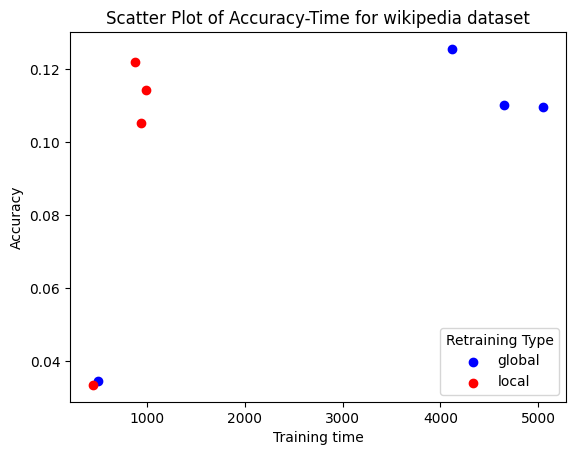

In [26]:
accu_time_plot(all_df)

In [27]:
temp_df = all_df.loc[all_df['retraining_type'] == 'global']
dict(temp_df.iloc[all_df['average_accuracy'].argmax()])

{'dataset': 'wikipedia',
 'retraining_type': 'global',
 'parameters': '(128, 40, 80, 0.25, 1)',
 'dynamic_update': 'extend',
 'average_accuracy': 0.1256420338240266,
 'training_time': 4115.74851751328}

#### PPI

In [28]:
config = {'dataset': 'PPI',
          'dynamic_update': 'extend',
          'metric': 'macro',
          'num_different_nodes': 512}

In [29]:
all_df = mult_params_accu_time_df_gen(results_df, config, all_parameters)

In [30]:
# sub_df = sub_df[sub_df.loc[:, 'retraining_type'] == 'global'].reset_index(drop=True)
all_df.sort_values(by='average_accuracy', ascending=False).head(15)

PPI,dataset,retraining_type,parameters,dynamic_update,average_accuracy,training_time
41,PPI,local,"(128, 40, 80, 2, 1)",extend,0.103872,103.184063
9,PPI,local,"(128, 80, 80, 4, 2)",extend,0.101657,172.781480
11,PPI,local,"(128, 80, 80, 4, 1)",extend,0.101450,167.833059
19,PPI,local,"(128, 80, 80, 1, 4)",extend,0.098656,174.081321
50,PPI,global,"(128, 40, 80, 0.25, 0.25)",extend,0.098650,388.765121
32,PPI,global,"(128, 40, 80, 4, 2)",extend,0.098615,425.821706
23,PPI,local,"(128, 80, 80, 1, 1)",extend,0.098259,168.280955
31,PPI,local,"(128, 40, 80, 4, 4)",extend,0.098193,101.546633
46,PPI,global,"(128, 40, 80, 1, 1)",extend,0.098017,421.142078
33,PPI,local,"(128, 40, 80, 4, 2)",extend,0.097698,102.307316


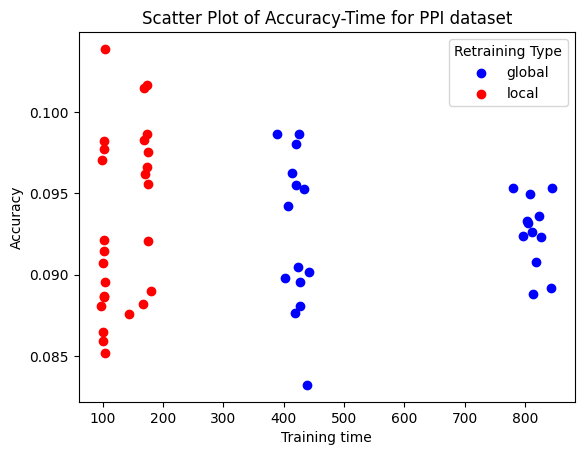

In [31]:
accu_time_plot(all_df)

In [32]:
temp_df = all_df.loc[all_df['retraining_type'] == 'global']
dict(temp_df.iloc[temp_df['average_accuracy'].argmax()])

{'dataset': 'PPI',
 'retraining_type': 'global',
 'parameters': '(128, 40, 80, 0.25, 0.25)',
 'dynamic_update': 'extend',
 'average_accuracy': 0.09864955767362732,
 'training_time': 388.765121221542}

#### BlogCatalog

In [33]:

#     config = {'dataset': 'blog_catalog',
#             'dynamic_update': 'extend',
#             'metric': 'macro',
#             'num_different_nodes': 1024}

## Table of results for specific dataset

In [34]:
# These are the parameters for calculating the gloal/local difference
config = {'dataset': 'cora',
          'dynamic_update': 'extend',
          'parameters': '(128, 40, 80, 4, 2)',
          'num_different_nodes': 512}

In [35]:
table_df = results_df.copy()

for key in config:
    table_df = table_df[table_df.loc[:, key] == config[key]]

In [36]:
table_df

,dataset,nodes,edges,retraining_type,metric,10%,20%,30%,40%,50%,60%,70%,80%,90%,parameters,training_time,dynamic_update,num_different_nodes,num_starting_nodes,execution_timestamp
852,cora,2708,5278,global,macro,0.854654,0.844468,0.844555,0.841998,0.823224,0.796318,0.796811,0.777196,0.768319,"(128, 40, 80, 4, 2)",105.576616,extend,512,512,08/06/2024 - 14:53
853,cora,2708,5278,global,micro,0.852399,0.846863,0.845018,0.845018,0.826440,0.802462,0.802743,0.784495,0.776046,"(128, 40, 80, 4, 2)",105.576616,extend,512,512,08/06/2024 - 14:53
854,cora,2708,5278,local,macro,0.824758,0.817843,0.829875,0.833960,0.805164,0.806052,0.783926,0.768466,0.733091,"(128, 40, 80, 4, 2)",32.564104,extend,512,512,08/06/2024 - 14:53
855,cora,2708,5278,local,micro,0.830258,0.824723,0.837638,0.837638,0.812408,0.814154,0.796941,0.778957,0.754717,"(128, 40, 80, 4, 2)",32.564104,extend,512,512,08/06/2024 - 14:53


In [37]:
dict(sub_df.iloc[sub_df['average_accuracy'].argmax()])

{'dataset': 'cora',
 'retraining_type': 'global',
 'parameters': '(128, 80, 160, 4, 4)',
 'average_accuracy': 0.7906122755311732,
 'training_time': 415.683768033981}

## Graphs 

In [38]:
speed_df = sub_df.copy()

In [39]:
speed_df.sort_values(by='average_accuracy', ascending=False).head(30)['parameters']

0    (128, 80, 160, 4, 4)
1    (128, 80, 160, 4, 4)
Name: parameters, dtype: object

In [40]:
# Function to convert string to tuple and extract required elements
def extract_elements(param_str):
    tuple_obj = ast.literal_eval(param_str)
    return tuple_obj[1], tuple_obj[2]

# Apply the function to the 'parameters' column and create new columns
speed_df[['walk_length', 'walks_num']] = speed_df['parameters'].apply(lambda x: pd.Series(extract_elements(x)))

In [41]:
speed_df.tail(8)

,dataset,retraining_type,parameters,average_accuracy,training_time,walk_length,walks_num
0,cora,global,"(128, 80, 160, 4, 4)",0.790612,415.683768,80,160
1,cora,local,"(128, 80, 160, 4, 4)",0.782657,124.809953,80,160


In [42]:
speed_df = speed_df.loc[speed_df['walk_length'] != 8]

In [43]:
speed_df['walk_length'].unique()

array([80])

In [44]:
global_speed_df = speed_df.loc[speed_df['retraining_type'] == 'global']
local_speed_df = speed_df.loc[speed_df['retraining_type'] == 'local']

In [45]:
global_speed_df

,dataset,retraining_type,parameters,average_accuracy,training_time,walk_length,walks_num
0,cora,global,"(128, 80, 160, 4, 4)",0.790612,415.683768,80,160


In [46]:
global_speed_df.loc[global_speed_df['walk_length'] == 80, 'training_time'].mean()

415.683768033981

In [47]:
local_speed_df.loc[local_speed_df['walk_length'] == 80, 'training_time'].mean()


124.809953451157

In [48]:
global_speed_df.loc[global_speed_df['walk_length'] == 40, 'training_time'].mean()

nan

In [49]:
local_speed_df.loc[local_speed_df['walk_length'] == 40, 'training_time'].mean()

nan

## One parameter set evaluation 

In [50]:
param_df = results_df.loc[results_df['parameters'] == '(128, 40, 80, 0.25, 1)']

In [51]:
# These are the parameters for calculating the gloal/local difference
config = {'parameters': '(128, 40, 80, 0.25, 1)',
          'metric': 'macro',
          'num_different_nodes': 512}

alL_stats_dict = {'extend': {}, 'prune': {}}

for dynamic_update in alL_stats_dict:

    for dataset in param_df['dataset'].unique():
        
        config['dataset'] = dataset
        sub_df = accu_time_df_gen(param_df, config)

        # if dynamic_update in list(sub_df['dynamic_update']):
        dynamic_df = sub_df[sub_df['dynamic_update'] == dynamic_update]
        dynamic_df = dynamic_df.reset_index(drop=True)

        # Calculate the average accuracy difference
        avg_accuracy_diff_perc = 100* (abs(dynamic_df.loc[0, 'average_accuracy'] - dynamic_df.loc[1, 'average_accuracy']) / dynamic_df.loc[0, 'average_accuracy'])

        # Calculate the training time difference
        training_time_diff_perc = 100* (abs(dynamic_df.loc[0, 'training_time'] - dynamic_df.loc[1, 'training_time'])) / dynamic_df.loc[0, 'training_time']

        alL_stats_dict[dynamic_update].update({dataset: (avg_accuracy_diff_perc, training_time_diff_perc)})


In [52]:
alL_stats_dict

{'extend': {'blog_catalog': (1.7591764122511893, 71.24197406370602),
  'wikipedia': (2.9285962240930377, 78.61304527981541),
  'PPI': (6.563866343758801, 75.9588752940188),
  'cora': (0.36741912773315977, 69.84596418737402)},
 'prune': {'blog_catalog': (3.4735885626950505, 64.88767819791232),
  'wikipedia': (16.72134276511298, 75.41873442683948),
  'PPI': (10.66271459251596, 79.64285125068935),
  'cora': (7.093595182937153, 91.96668580929749)}}

In [53]:
'prune' in list(sub_df['dynamic_update'])

True

In [55]:
sub_df = accu_time_df_gen(param_df, config)
sub_df

,dataset,retraining_type,parameters,dynamic_update,average_accuracy,training_time
0,cora,global,"(128, 40, 80, 0.25, 1)",prune,0.750689,81.678901
1,cora,local,"(128, 40, 80, 0.25, 1)",prune,0.697438,6.561523
2,cora,global,"(128, 40, 80, 0.25, 1)",extend,0.794214,102.186127
3,cora,local,"(128, 40, 80, 0.25, 1)",extend,0.791296,30.813241


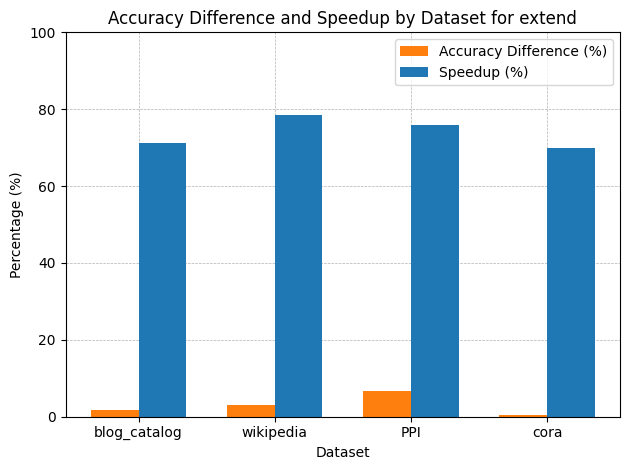

In [56]:
dynamic_update = 'extend'
stats_dict = alL_stats_dict[dynamic_update]

speed_accu_plot(alL_stats_dict, dynamic_update)

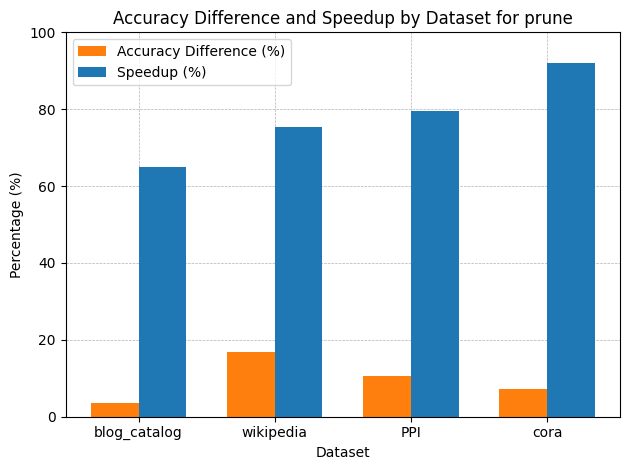

In [57]:
dynamic_update = 'prune'
stats_dict = alL_stats_dict[dynamic_update]

speed_accu_plot(alL_stats_dict, dynamic_update)